# Hands-on Exercise for CLUS Module


### 0. Setting up necessary packages and creating data 

In [4]:
!pip install --user scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /users/PES0801/dhwanivora9/.local/lib/python3.6/site-packages
Requirement already up-to-date: numpy>=1.11.0 in /users/PES0801/dhwanivora9/.local/lib/python3.6/site-packages (from scikit-learn)
Requirement already up-to-date: scipy>=0.17.0 in /users/PES0801/dhwanivora9/.local/lib/python3.6/site-packages (from scikit-learn)
Requirement already up-to-date: joblib>=0.11 in /users/PES0801/dhwanivora9/.local/lib/python3.6/site-packages (from scikit-learn)
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Import necessary packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



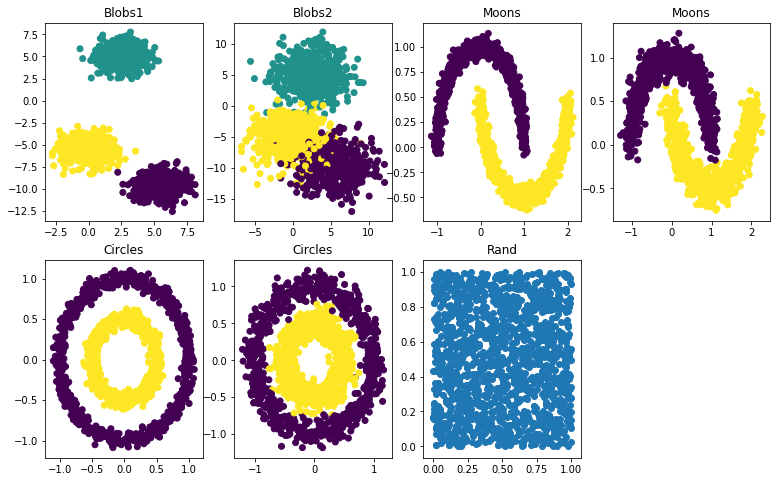

In [6]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [23]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [24]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [61]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Visually we understand that kmeans would be able to fairly cluster data in blobs1 and blobs2 since data in the respectives sets are globular, same in size and also doesnt vary in terms of density of the datapoints** </span>

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Kmeans doesnt work well, when dataset present is either non globular, not same in size and has varying densities in the datapoints** </span>



<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

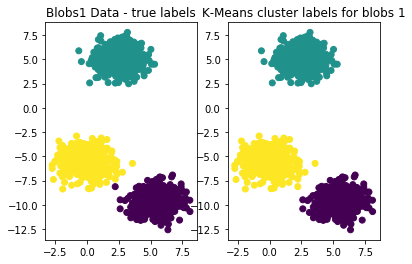

In [32]:
n_clusters1 = 3
kmeans1 = KMeans(n_clusters=n_clusters1, random_state=random_state);
fig, ax = plt.subplots()
plt.subplot(1,2,1)
y_pred1 = kmeans1.fit_predict(Blobs1_X)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred1)  # KMeans clusters
plt.title('K-Means cluster labels for blobs 1')
plt.show()

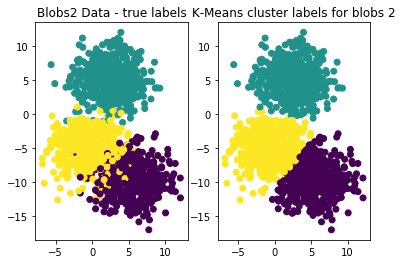

In [59]:
kmeans2 = KMeans(n_clusters=n_clusters1, random_state=random_state);
fig, ax = plt.subplots()
plt.subplot(1,2,1)
y_pred2 = kmeans2.fit_predict(Blobs2_X)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y) # true clusters
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred2)  # KMeans clusters
plt.title('K-Means cluster labels for blobs 2')
plt.show()

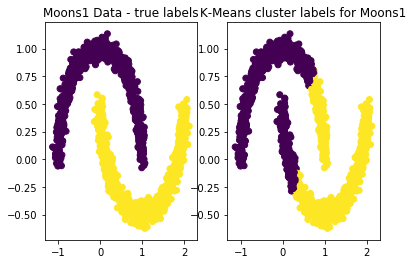

In [60]:
n_clusters = 2
kmeans3 = KMeans(n_clusters=n_clusters, random_state=random_state);
fig, ax = plt.subplots()
plt.subplot(1,2,1)
y_pred3 = kmeans3.fit_predict(Moons1_X)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y) # true clusters
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred3)  # KMeans clusters
plt.title('K-Means cluster labels for Moons1')
plt.show()

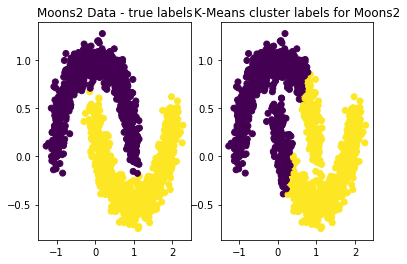

In [61]:
kmeans4 = KMeans(n_clusters=n_clusters, random_state=random_state);
fig, ax = plt.subplots()
plt.subplot(1,2,1)
y_pred4 = kmeans4.fit_predict(Moons2_X)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y) # true clusters
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred4)  # KMeans clusters
plt.title('K-Means cluster labels for Moons2')
plt.show()

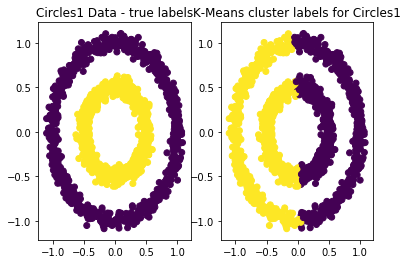

In [62]:
kmeans5 = KMeans(n_clusters=n_clusters, random_state=random_state);
fig, ax = plt.subplots()
plt.subplot(1,2,1)
y_pred5 = kmeans5.fit_predict(Circles1_X)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y) # true clusters
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred5)  # KMeans clusters
plt.title('K-Means cluster labels for Circles1')
plt.show()

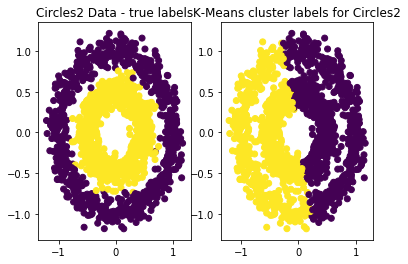

In [63]:
kmeans6 = KMeans(n_clusters=n_clusters, random_state=random_state);
fig, ax = plt.subplots()
plt.subplot(1,2,1)
y_pred6 = kmeans6.fit_predict(Circles2_X)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y) # true clusters
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred6)  # KMeans clusters
plt.title('K-Means cluster labels for Circles2')
plt.show()

<span style="color:green">**Answer:Bsased on the above graphs we can say that kmeans is able to cluster the dataset in the following ranks Blobs1 > Blobs2 > Moons1 > Moons2 > Cirlces1 > Circles2 . Visually we see that Blobs1 and Blobs 2 are clearly getting clustered as per the dataset however in moons and circles  we see that more dataset in moons are getting clustered correctly as compared to the ones in circles ** </span>



In [64]:
score1 = -kmeans1.score(Blobs1_X)
print(score1)

score2 = -kmeans2.score(Blobs2_X)
print(score2)

score3 = -kmeans3.score(Moons1_X)
print(score3)

score4 = -kmeans4.score(Moons2_X)
print(score4)

score5 = -kmeans5.score(Circles1_X)
print(score5)

score6 = -kmeans6.score(Circles2_X)
print(score6)


2875.575460810548
16414.2674115897
601.2025348798403
616.0456903326541
598.020543255273
611.2805756529305


<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

In [65]:
print(rand_index(y_pred1, Blobs1_y))
print(rand_index(y_pred2, Blobs2_y))
print(rand_index(y_pred3, Moons1_y))
print(rand_index(y_pred4, Moons2_y))
print(rand_index(y_pred5, Circles1_y))
print(rand_index(y_pred6, Circles2_y))

0.99911140760507
0.9207142539470758
0.6201236379808761
0.6240836112964199
0.4996744496330887
0.4996806760062264


<span style="color:green">**Answer:Ranking of the dataset in decreasing order of rand-index scores is  : Blobls1 > Blobls2 > Moons2 > Moons1 > Circles2 > Circles 1 ** </span>



<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:As per the ranking mentioned in the above question; there is change in ranking and this difference is mainly due to very minute difference in the scores. This difference is primarily becasue of the data size** </span>



### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Visually we can say that single-link agglomerative clustering works well where there is less noise in the dataset. i.e blobs1, moons1, circles1 will be clustered well using single link as compared to the dataset in blobs2, moons2 and circles2 since these dataset have more noise and overlapping datasets within the two clusters ** </span>



<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Blobs2, moons2 and circles2 dataset will not work well in single link agglomerative clustering** </span>



<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

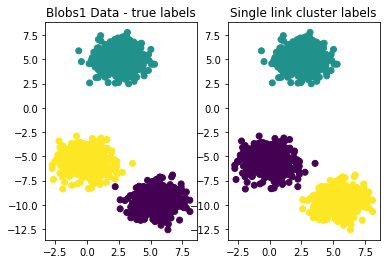

In [66]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters1)
y_pred7 = single_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred7)
plt.title('Single link cluster labels')
plt.show()

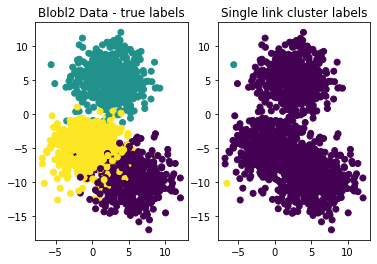

In [67]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters1)
y_pred8 = single_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobl2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred8)
plt.title('Single link cluster labels')
plt.show()

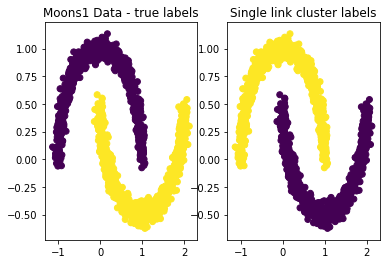

In [68]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred9 = single_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred9)
plt.title('Single link cluster labels')
plt.show()

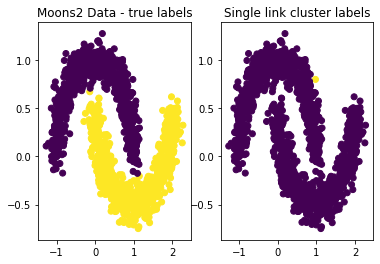

In [69]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred10 = single_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred10)
plt.title('Single link cluster labels')
plt.show()

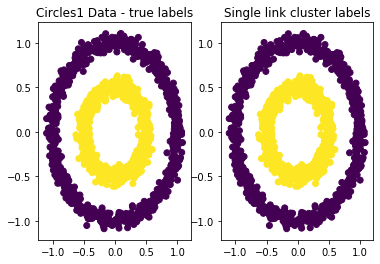

In [70]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred11 = single_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred11)
plt.title('Single link cluster labels')
plt.show()

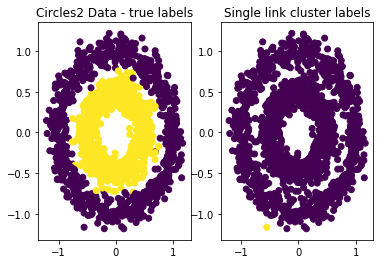

In [79]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred12 = single_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred12)
plt.title('Single link cluster labels')
plt.show()

<span style="color:green">**Answer:All dataset ending with 1 have been clustered more accurately. i.e Moons1, Circles1 then followed by Blobls1 and then follwed by Moons2, circles2 and finally followed by blobs2. Since points in dataset ending with 1 are getting clearly and accurately getting clustered whereas in moons2, blobs2 and circles2 entire dataset is getting clustered as one.** </span>



<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [72]:
print(rand_index(y_pred7, Blobs1_y))
print(rand_index(y_pred8, Blobs2_y))
print(rand_index(y_pred9, Moons1_y))
print(rand_index(y_pred10, Moons2_y))
print(rand_index(y_pred11, Circles1_y))
print(rand_index(y_pred12, Circles2_y))

0.99911140760507
0.33377896375361354
1.0
0.49966733377807426
1.0
0.49966733377807426


<span style="color:green">**Answer:Rank of the rand-index scores are Moons1-Circles1 > Blobls1 > Moons2-Circles2 > Blobs2** </span>



<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:Yes the ranking observed are consistent with the one acheived in 2d** </span>



### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:According to me the max-link agglomerative clustering will work best for Blobs1 as the per the wokring of this clustering the clusters picks the min of the max distances between the points and combines onto one cluster. In all other dataset, since clusters are very close chances of them getting clustered together are very high. ** </span>



<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:As per the resoning mentioned in 3a, according to me all other dataset except Blobs1 is not expected to perform well in Max-link agglomerative clustering** </span>



<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

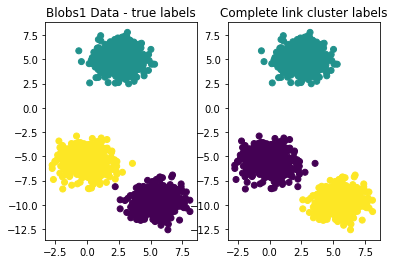

In [74]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters1)
y_pred13 = complete_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred13)
plt.title('Complete link cluster labels')
plt.show()

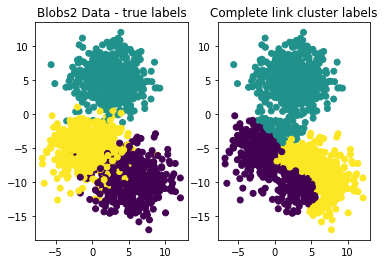

In [78]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters1)
y_pred14 = complete_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs1_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred14)
plt.title('Complete link cluster labels')
plt.show()

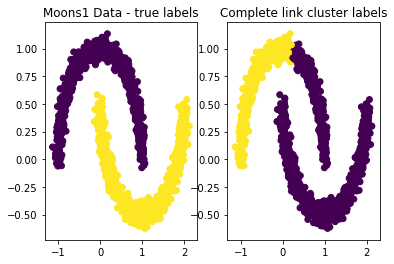

In [84]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred15 = complete_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred15)
plt.title('Complete link cluster labels')
plt.show()

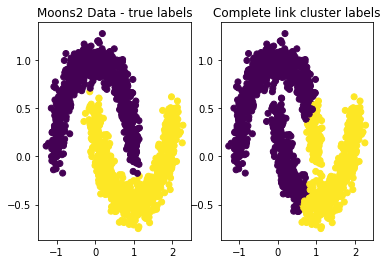

In [85]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred16 = complete_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred16)
plt.title('Complete link cluster labels')
plt.show()

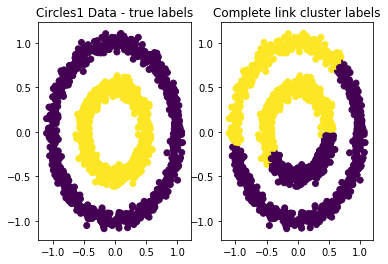

In [86]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred17 = complete_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred17)
plt.title('Complete link cluster labels')
plt.show()

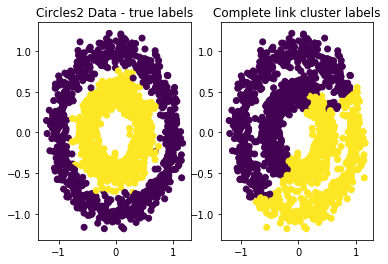

In [90]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred18 = complete_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred18)
plt.title('Complete link cluster labels')
plt.show()

<span style="color:green">**Answer : Visually we understand the max-link agglomerative clustering has worked best on Blob1 > Blobs2 > Moons1 > Moons2 > Circles1 > Circles2 . In this clustering method, Blobs 1 and Blobs 2 are expected to perform well as the clusters are separated well and are separated with considerable distance. However in Moons and circles dataset shape is non globular and also are placed very close to each other where agglomerative is not expected to perform well** </span>



<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [92]:
print(rand_index(y_pred13, Blobs1_y))
print(rand_index(y_pred14, Blobs2_y))
print(rand_index(y_pred15, Moons1_y))
print(rand_index(y_pred16, Moons2_y))
print(rand_index(y_pred17, Circles1_y))
print(rand_index(y_pred18, Circles2_y))

0.99911140760507
0.7736544362908606
0.662605292417167
0.5965310206804536
0.5218714698688014
0.5000587058038692


<span style="color:green">**Answer:Rank of the rand index are as follows : Blobs1 > Blobs2 > Moons1 > Moons2 > Circles1 > Circles2 ** </span>



<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: yes, ranking is consistent** </span>



### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Avaerage Agglomerative is also expected to work well in Blobs than Moons and Circles dataset. Primarily this is because the agglomerative clustering works on euclidean distance where clusters if separated well with considerable distances then they are expected to work well. In our dataset Blobs dataset are compartively separated well interms of distances as compared to Moons and Circles** </span>



<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Agglomerative is not expected to work well in moons and circles dataset ** </span>



<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

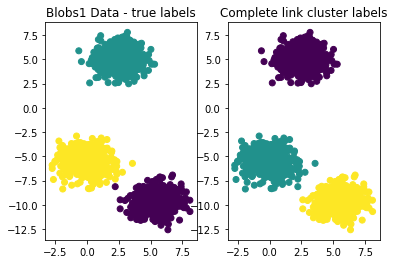

In [107]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters1)
y_pred19 = average_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred19)
plt.title('Average link cluster labels')
plt.show()

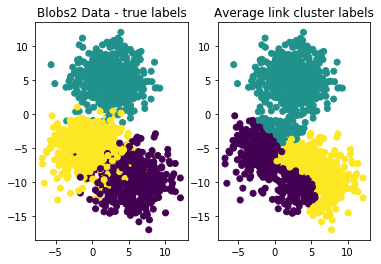

In [110]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters1)
y_pred20 = average_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs1_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred14)
plt.title('Average link cluster labels')
plt.show()

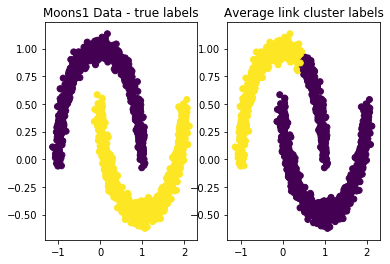

In [111]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred21 = average_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred21)
plt.title('Average link cluster labels')
plt.show()

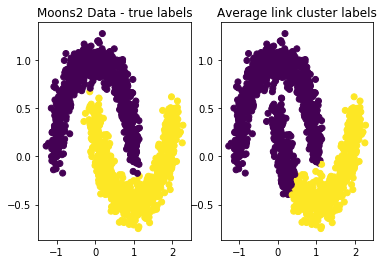

In [117]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred22 = average_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred22)
plt.title('Average link cluster labels')
plt.show()

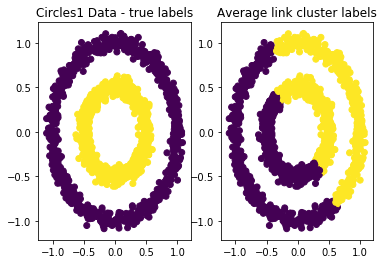

In [114]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred23 = average_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred23)
plt.title('Average link cluster labels')
plt.show()

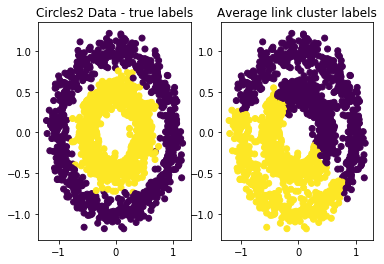

In [115]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred24 = average_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred24)
plt.title('Average link cluster labels')
plt.show()

<span style="color:green">**Answer:max-link agglomerative clustering has worked best on Blobs1 > Blobs2 > Moons1 > Moons2 > Circles1 > Circles2 . In this clustering method, Blobs 1 and Blobs 2 are expected to perform well as the clusters are separated well and are separated with considerable distance. However in Moons and circles dataset shape is non globular and also are placed very close to each other where agglomerative is not expected to perform well** </span>



<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [118]:
print(rand_index(y_pred19, Blobs1_y))
print(rand_index(y_pred20, Blobs2_y))
print(rand_index(y_pred21, Moons1_y))
print(rand_index(y_pred22, Moons2_y))
print(rand_index(y_pred23, Circles1_y))
print(rand_index(y_pred24, Circles2_y))

0.99911140760507
0.7636575494774294
0.7132310429175005
0.7457647320435846
0.500414498554592
0.5050780520346898


<span style="color:green">**Answer:Ranking as per the rand index is Blobs1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1 ** </span>



<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:The ranking is same, however there is a minute diffrence which is primarily due to number of points in the dataset ** </span>



### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:DBSCAN is expected to work well in all dataset except blobs2. DBSCAN primarily helps in identifying core and noise points. Here all dataset have specific densities and are clusters with specific densities are separated well except blobs2.** </span>



<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Here clearly blobs2 is not expected to work well as the densitites of each of the clusters are not separated well and there is a overlap within the clusters ** </span>




<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

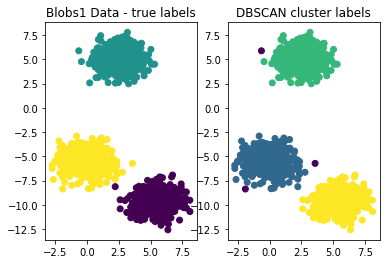

In [188]:
dbscan = DBSCAN(eps=1, min_samples=10)
y_pred25 = dbscan.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred25)
plt.title('DBSCAN cluster labels')
plt.show()

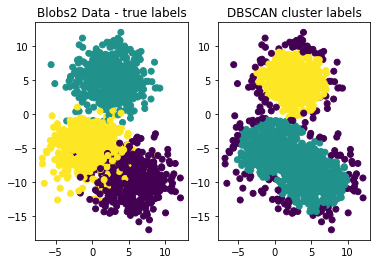

In [236]:
dbscan = DBSCAN(eps=1.1, min_samples=17)
y_pred26 = dbscan.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred26)
plt.title('DBSCAN cluster labels')
plt.show()

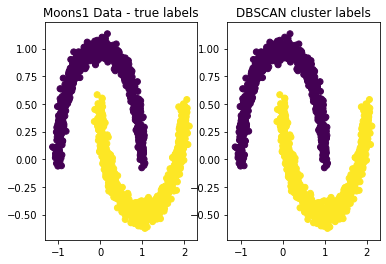

In [145]:
dbscan = DBSCAN(eps=0.1, min_samples=10)
y_pred27 = dbscan.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred27)
plt.title('DBSCAN cluster labels')
plt.show()

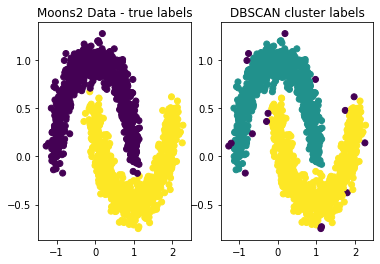

In [198]:
dbscan = DBSCAN(eps=0.1, min_samples=3)
y_pred28 = dbscan.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred28)
plt.title('DBSCAN cluster labels')
plt.show()

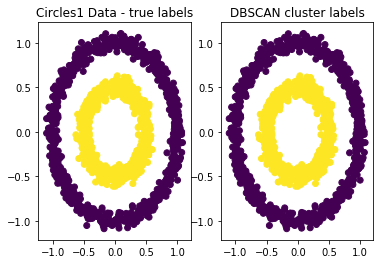

In [164]:
dbscan = DBSCAN(eps=0.1, min_samples=10)
y_pred29 = dbscan.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred29)
plt.title('DBSCAN cluster labels')
plt.show()

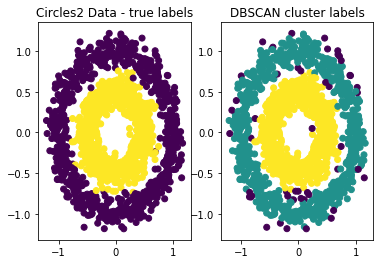

In [203]:
dbscan = DBSCAN(eps=0.1, min_samples=8)
y_pred30 = dbscan.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred30)
plt.title('DBSCAN cluster labels')
plt.show()

<span style="color:green">**Answer:Following is the rank of datasets Moons1 = Circles1 > Blobs1 > Moons2 > Circles2 > Blobs2. As seen for the cluster labesl of the respective dataset we see that data non-globular data with specific densities are clustered well  and dataset with overlapping densities have poorly been clustered usinf DBSCAN ** </span>



<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

In [192]:
np.sum(y_pred25==-1)

3

In [237]:
np.sum(y_pred26==-1)

183

In [194]:
np.sum(y_pred27==-1)

0

In [204]:
np.sum(y_pred28==-1)

16

In [196]:
np.sum(y_pred29==-1)

0

In [205]:
np.sum(y_pred30==-1)

48

<span style="color:green">**Answer: Blobs1 , Moons1, Circles1 have the least noise and the reason that these dataset have least point is because the points in these dataset are placed very close and compactly to each other ** </span>



<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [238]:
y_pred25[y_pred25==-1]=5
y_pred26[y_pred26==-1]=5
y_pred27[y_pred27==-1]=5
y_pred28[y_pred28==-1]=5
y_pred29[y_pred29==-1]=5
y_pred30[y_pred30==-1]=5
print(rand_index(y_pred25, Blobs1_y))
print(rand_index(y_pred26, Blobs2_y))
print(rand_index(y_pred27, Moons1_y))
print(rand_index(y_pred28, Moons2_y))
print(rand_index(y_pred29, Circles1_y))
print(rand_index(y_pred30, Circles2_y))


0.997781632199244
0.7356344229486325
1.0
0.9854311763397821
1.0
0.9590802757393818


<span style="color:green">**Answer:Rank as per the randindex is Moons1 = Circles1 > Blobs1 > Moons2 > Circles2 > Blobs2 ** </span>



<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer: Yes the ranking is consistent** </span>



### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Spectral Clustering is expected to work well speficially in Blobss dataset as the points can be well connected with the other nodes/points and similarly clustered is formed based on the communities of the nodes  ** </span>



<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Here Moons and Circles dataset is not expected to work well as the spectral clustering consideres the distance between the respective clusters and its shape, hence moons and circles dataset are example of non globular dataset and hence spectral will not work well here** </span>



<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

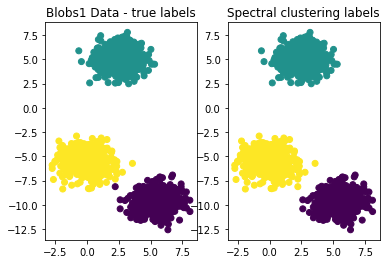

In [209]:
spectral = SpectralClustering(n_clusters=n_clusters1, random_state=random_state)
y_pred31 = spectral.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred31)
plt.title('Spectral clustering labels')
plt.show()

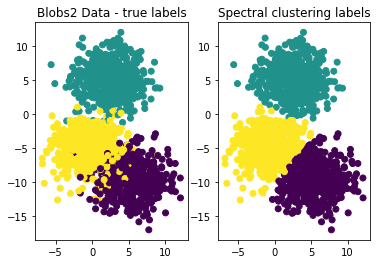

In [210]:
spectral = SpectralClustering(n_clusters=n_clusters1, random_state=random_state)
y_pred32 = spectral.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred32)
plt.title('Spectral clustering labels')
plt.show()

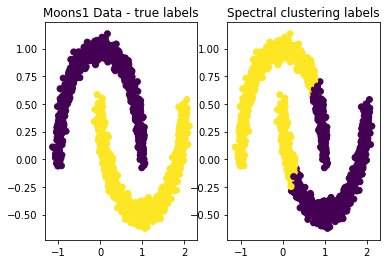

In [212]:
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred33 = spectral.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred33)
plt.title('Spectral clustering labels')
plt.show()

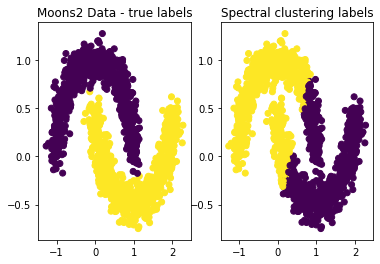

In [213]:
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred34 = spectral.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred34)
plt.title('Spectral clustering labels')
plt.show()

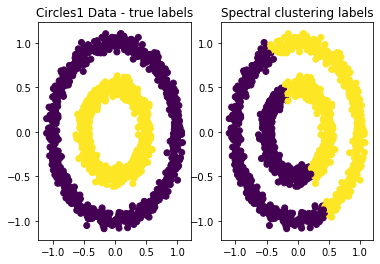

In [214]:
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred35 = spectral.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred35)
plt.title('Spectral clustering labels')
plt.show()

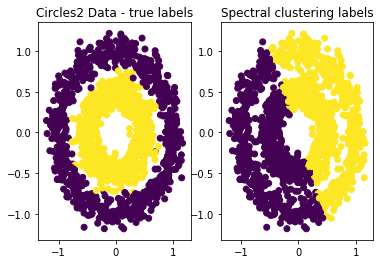

In [215]:
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred36 = spectral.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred36)
plt.title('Spectral clustering labels')
plt.show()

<span style="color:green">**Answer:Visually we understand that Blobs1 > Blobs2 > Moons1 = Moons2 > Circles1 = Circles2 ** </span>



<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [216]:
print(rand_index(y_pred31, Blobs1_y))
print(rand_index(y_pred32, Blobs2_y))
print(rand_index(y_pred33, Moons1_y))
print(rand_index(y_pred34, Moons2_y))
print(rand_index(y_pred35, Circles1_y))
print(rand_index(y_pred36, Circles2_y))

0.99911140760507
0.919189682010229
0.6441263064265066
0.6448441183010896
0.49966733377807426
0.4997553924838781


<span style="color:green">**Answer:Dataset ranking is Blobs1 > Blobs2 > Moons2 = Moons1 > Circles1 = Circles2 ** </span>



<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:Yes the rankings are consistent** </span>



### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:As per the above performed clustering we understand that dataset Blobs1, Moons1 and Circles1 have shown better clustering tendency. As points in these dataset are compact and each of the clustered are appropriately separated** </span>



<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:Blobs2, Moons2, Circles2 and Rand dataset does not exhibit good clustering tendency since there is overlap in density of each cluster ** </span>



<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

In [241]:
hopkins(Blobs1_X)

0.9339195943252331

In [33]:
hopkins(Blobs2_X)

0.8481516846155475

In [34]:
hopkins(Moons1_X)

0.9259565726916447

In [51]:
hopkins(Moons2_X)

0.8793160077528192

In [36]:
hopkins(Circles1_X)

0.8537816515098501

In [37]:
hopkins(Circles2_X)

0.7657785043802339

In [38]:
hopkins(Rand_X)

0.6176213024531438

<span style="color:green">**Answer: As per the Hopkins statistics rank is Blobs1 > Moons1 > Moons2 > Blobs2 > Circles1 > Circles2 > Rand ** </span>



<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer:There is inconsistency in ranking and that is primarily becasue of Moons2 which was expected to not show good clustering tendency   ** </span>



<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

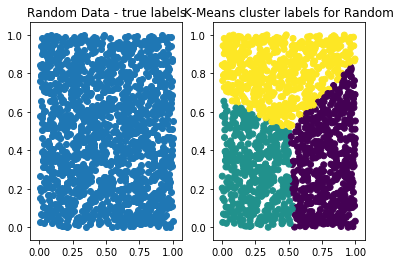

In [253]:
kmeans = KMeans(n_clusters=n_clusters1, random_state=random_state);
fig, ax = plt.subplots()
plt.subplot(1,2,1)
y_pred_ra1 = kmeans.fit_predict(Rand_X)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Random Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_ra1)  # KMeans clusters
plt.title('K-Means cluster labels for Random')
plt.show()

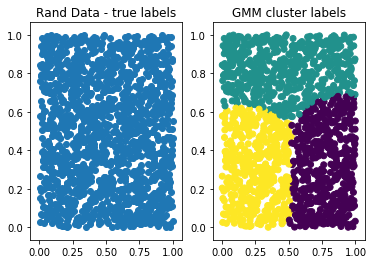

In [264]:
gmm = GaussianMixture(n_components=n_clusters1, covariance_type='full')
y_pred_ra5 = gmm.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_ra5)  # EM clusters
plt.title('GMM cluster labels')
plt.show()

/usr/local/anaconda5/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


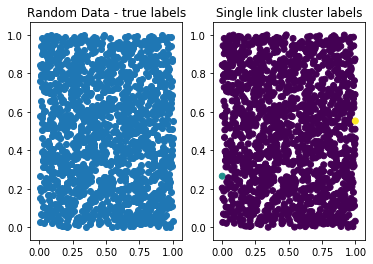

In [258]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters1)
y_pred_ra2 = single_linkage.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Random Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_ra2)
plt.title('Single link cluster labels')
plt.show()

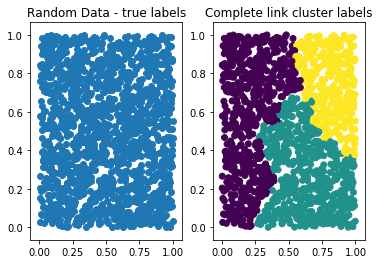

In [261]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters1)
y_pred_ra3 = complete_linkage.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Random Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_ra3)
plt.title('Complete link cluster labels')
plt.show()

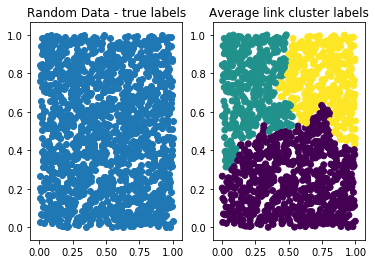

In [263]:
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters1)
y_pred_ra4 = average_linkage.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Random Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_ra4)
plt.title('Average link cluster labels')
plt.show()

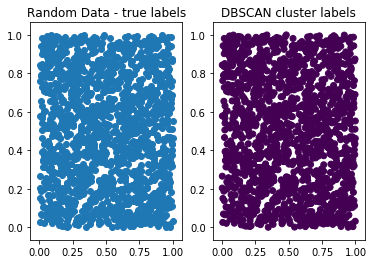

In [267]:
dbscan = DBSCAN(eps=0.1, min_samples=8)
y_pred_ra7 = dbscan.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Random Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_ra7)
plt.title('DBSCAN cluster labels')
plt.show()

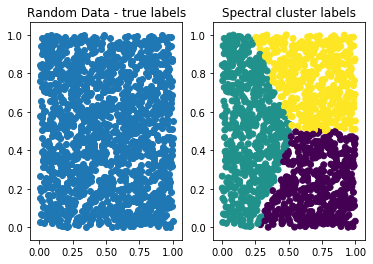

In [266]:
spectral = SpectralClustering(n_clusters=n_clusters1, random_state=random_state)
y_pred_ra6 = spectral.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Random Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_ra6)
plt.title('Spectral cluster labels')
plt.show()

<span style="color:green">**Answer: 
    Kmeans : Since here we define number of cluster=3 so the randomly three centroids are selected and since the data is equidistance so 3 clusteres are formed. <br> 
    GMM : This method is very much like kmeans where instead of distances , probablity of the point to be part of a specific cluster <br>
    Single LinK : Here we consider the min distance of a point to other and since all points are closely placed to each other, the overall clustering results as one huge cluster as per agglomerative clustering <br>
    Complete Link : Here we consider the max distance of a point to a cluster formed by using agglomerative clustering and hence 3 clusters are formed <br>
    Average Link : Here we consider average of a point to the cluster and since we have defned number of clusters as 3 therefore we get 3 clusters.
    DBSCAN : this method is based on identifying highly dense cluster which is the entire dataset in Random dataset
    Spectral : Again this clustering is very much similar to kmeans where 3 clusters are formed
    hdkjsc
    ** </span>



### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [10]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [12]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [13]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [14]:
Cancer_X.shape

(569, 30)

In [15]:
Cancer_y.shape

(569,)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

In [20]:
score = np.zeros(41);
for i in range(2,41):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Cancer_X)  #Clustering using KMeans
    score[i] = -kmeans.score(Cancer_X)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29
SSE for k= 21 : 3312041.59
SSE for k= 22 : 3102392.22
SSE for k= 23 : 2894387.69
SSE for k= 24 : 2768624.68
SSE for k= 25 : 2685795.48
SSE for k= 26 : 2514580.5
SSE for k= 27 : 2362959.95
SSE for k= 28 : 2257591.62
SSE for k= 29 : 2148955.49
SSE for k= 30 : 2036764.0
SSE for k= 31 : 1969448.35
SSE for k= 32 : 1833170.63
SSE for k= 33 : 1791369.0
SSE for k= 34 : 1722589.76
SSE for k= 35 : 1677340.13
SSE for k= 36 : 1656114.54
SSE for k= 37 : 1528956.63
SSE for k= 38 : 1496563.45
SSE for k

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

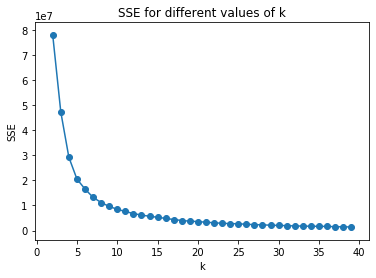

In [18]:
plt.plot(range(2,40),score[2:40])
plt.scatter(range(2,40),score[2:40])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer:K=4 will be used as no major reduction is observed after 4** </span>



<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

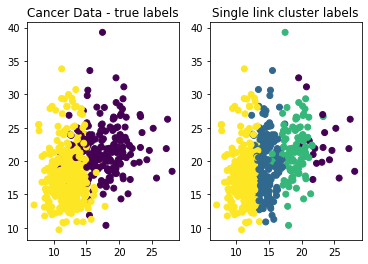

In [60]:
n_clusters2 = 4
kmeans_cancer = KMeans(n_clusters=n_clusters2, random_state=random_state);
y_pred_kmeans = kmeans_cancer.fit_predict(Cancer_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c=Cancer_y)
plt.title('Cancer Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c=y_pred_kmeans)
plt.title('Single link cluster labels')
plt.show()

<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

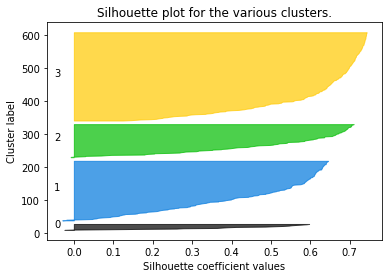

In [62]:
silhouette(Cancer_X,y_pred_kmeans)

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer: Cluster 3 will be treated as good cluster as and cluster 0 is considered to be not so good cluster** </span>



<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [63]:
print(rand_index(y_pred_kmeans, Cancer_y))

0.7009641327755638


<span style="color:green">**Answer:Clustering with this rand index is not considered to be a good quality clustering** </span>



<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

<span style="color:green">**Answer:** </span>

